# **HODGKIN-HUXLEY MODEL**
*  #### `This model tells us how neurol generate and propogate electircal singal known action potential ( also spikes)`
<div style="display:flex; gap:18px; align-items:center;">
  <!-- Left: plots image -->
  <div style="flex:1; text-align:center;">
    <img src="Graphics_asset/neral_spike.gif" alt="Hodgkin–Huxley Simulation Plots" width="65%" style="border-radius:10px;">
    <p style="font-size:0.9em; color:gray;"><i>Figure 1: Membrane potential and gating variable dynamics</i></p>
  </div>

  <!-- Right: equations (LaTeX, not an image) -->
  <div style="flex:1; text-align:center;">
  
$$
\begin{aligned}
C_m \frac{dV}{dt} &= \bar{g}_{Na} m^3 h \,(E_{Na}-V)
+ \bar{g}_{K} n^4 (E_{K}-V)
+ g_{L} (E_{L}-V) \\
\frac{dm}{dt} &= \alpha_m(V)\,(1-m) - \beta_m(V)\,m \\
\frac{dh}{dt} &= \alpha_h(V)\,(1-h) - \beta_h(V)\,h \\
\frac{dn}{dt} &= \alpha_n(V)\,(1-n) - \beta_n(V)\,n
\end{aligned}
$$

  
  <p style="font-size:0.9em; color:gray;"><i>Figure 2: Hodgkin–Huxley model system of differential equations</i></p>
  </div>
</div>


### ⚙️ Final Two Differential Equations
*(Standard 2-variable Hodgkin–Huxley reduction)*

Assume $m \approx m_\infty(V)$ and $h \approx h_\infty(V)$.
Then the reduced system becomes:

$$
\boxed{
C_m \frac{dV}{dt}
= - g_{Na} \, m_\infty(V)^3 \, h_\infty(V) \, (V - E_{Na})
- g_K \, n^4 (V - E_K)
- g_L (V - E_L)
+ I_{\text{ext}}
}
$$

$$
\boxed{
\frac{dn}{dt} = \frac{n_\infty(V) - n}{\tau_n(V)}
}
$$

---

### 🧩 Parameter Definitions

* $C_m$: membrane capacitance
* $g_{Na}, g_K, g_L$: maximum conductances
* $E_{Na}, E_K, E_L$: reversal potentials

And the voltage-dependent steady-state functions:

$$
m_\infty(V) = \frac{\alpha_m(V)}{\alpha_m(V) + \beta_m(V)}, \quad
h_\infty(V) = \frac{\alpha_h(V)}{\alpha_h(V) + \beta_h(V)}, \quad
n_\infty(V) = \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
$$

Time constant for $n$:

$$
\tau_n(V) = \frac{1}{\alpha_n(V) + \beta_n(V)}
$$

### Parameter roster



## Mission Parameters: Hodgkin-Huxley Squid Giant Axon Model

| Parameter | Symbol | Value | Units | Strategic Purpose |
| :--- | :--- | :--- | :--- | :--- |
| **Membrane Capacitance** | `C_m` | `1.0` | `μF/cm²`| Stores the electrical charge across the membrane. |
| **Max Sodium Conductance** | `g_Na` | `120.0`| `mS/cm²` | Determines the maximum possible influx of sodium ions; powers the spike's rising phase. |
| **Max Potassium Conductance** | `g_K` | `36.0` | `mS/cm²`| Determines the maximum possible efflux of potassium ions; drives the spike's falling phase. |
| **Leak Conductance** | `g_L` | `0.3` | `mS/cm²` | Represents the passive flow of other ions, primarily chloride; stabilizes the resting potential. |
| **Sodium Potential** | `E_Na` | `50.0` | `mV` | The Nernst potential for sodium. The 'target' voltage the spike aims for during its upstroke. |
| **Potassium Potential** | `E_K` | `-77.0` | `mV` | The Nernst potential for potassium. The 'target' voltage for hyperpolarization. |
| **Leak Potential** | `E_L` | `-54.387` | `mV` | The combined potential for leak ions, chosen to ensure the resting state is stable. |

### These constant are measured and pysically grounded


In [3]:
using DifferentialEquations, Plots


In [4]:


C_m=1.0            #  μF/cm²
g_Na = 120.0       #  mS/cm²
g_K= 36.0          #  mS/cm²
g_L=0.3            #  mS/cm²
E_Na=50.0          #  mV
E_K=-77.0          #  mV 
E_L= -54.387       # mV


-54.387

### Defining the rate equation ( increating or decrease) for all three gates
     Total 6 equations αₘ(V), βₘ(V) * αₕ(V), βₕ(V) * αₙ(V), βₙ(V)
* There were experimently fitted by Hodgkin and Huxley.


In [ ]:
    # Rate constants for gating variables (Hodgkin–Huxley, Squid Giant Axon)
    # -------------------------------------------------------------
    # Piecewise-limit safeguard for αₘ(V) and αₙ(V)

    α_m(V) = abs(25.0 - V) < 1e-6 ? 1.0 : 0.1 * (25.0 - V) / (exp((25.0 - V) / 10.0) - 1.0)
    β_m(V) = 4.0 * exp(-V / 18.0)

    α_h(V) = 0.07 * exp(-V / 20.0)
    β_h(V) = 1.0 / (exp((30.0 - V) / 10.0) + 1.0)

    α_n(V) = abs(10.0 - V) < 1e-6 ? 0.1 : 0.01 * (10.0 - V) / (exp((10.0 - V) / 10.0) - 1.0)
    β_n(V) = 0.125 * exp(-V / 80.0)


β_n (generic function with 1 method)

In [6]:
steady_state(α, β, V) = α(V) / (β(V) + α(V))
time_constant(α, β, V) = 1.0 / (α(V) + β(V))


time_constant (generic function with 1 method)

In [7]:
m_inf(V) = steady_state(α_m, β_m, V)
tau_m(V) = time_constant(α_m, β_m, V)

h_inf(V) = steady_state(α_h, β_h, V)
tau_h(V) = time_constant(α_h, β_h, V)

n_inf(V) = steady_state(α_n, β_n, V)
tau_n(V) = time_constant(α_n, β_n, V)
    

tau_n (generic function with 1 method)

In [8]:
Vs = -100:1:50

-100:1:50

In [9]:
m_vals = [m_inf(V) for V in Vs]
h_vals = [h_inf(V) for V in Vs]
n_vals = [n_inf(V) for V in Vs]
tau_n_vals = [tau_n(V) for V in Vs]


151-element Vector{Float64}:
 2.291941861813979
 2.3207602993974823
 2.3499399312687004
 2.37948514397165
 2.409400360488176
 2.439690038485217
 2.4703586682835104
 2.5014107705151583
 2.5328508934338507
 2.564683609837571
 ⋮
 2.4537311069350882
 2.405792609937247
 2.3592840652004257
 2.3141664527020374
 2.2704002688436757
 2.227945784216123
 2.1867632678596562
 2.146813180947095
 2.1080563427101766

In [10]:
using Plots

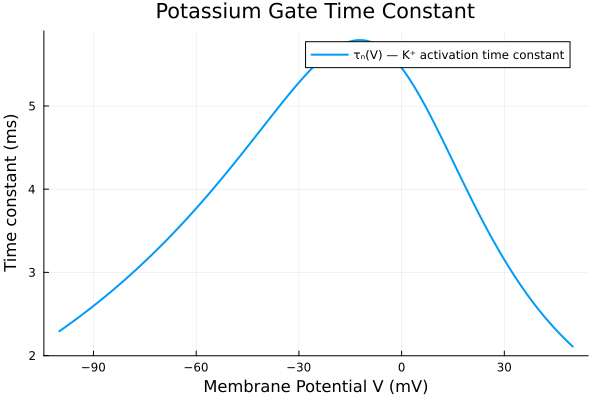

In [11]:
using Plots

# Voltage range for evaluation (mV)
Vs = -100:1:50

# Compute gating values
m_vals = [m_inf(V) for V in Vs]
h_vals = [h_inf(V) for V in Vs]
n_vals = [n_inf(V) for V in Vs]
tau_n_vals = [tau_n(V) for V in Vs]

# ------------------------------
# Plot 1: Steady-state activation & inactivation
# ------------------------------
plot(Vs, m_vals, label="m∞(V) — Na⁺ activation", lw=2, grid=true)
plot!(Vs, h_vals, label="h∞(V) — Na⁺ inactivation", lw=2)
plot!(Vs, n_vals, label="n∞(V) — K⁺ activation", lw=2)
xlabel!("Membrane Potential V (mV)")
ylabel!("Steady-state value")
title!("Steady-State Gating Variables")
plot!(legend=:bottomright)

# ------------------------------
# Plot 2: Time constant τₙ(V)
# ------------------------------
plot(Vs, tau_n_vals,
     label="τₙ(V) — K⁺ activation time constant",
     lw=2,
     xlabel="Membrane Potential V (mV)",
     ylabel="Time constant (ms)",
     title="Potassium Gate Time Constant",
     grid=true)


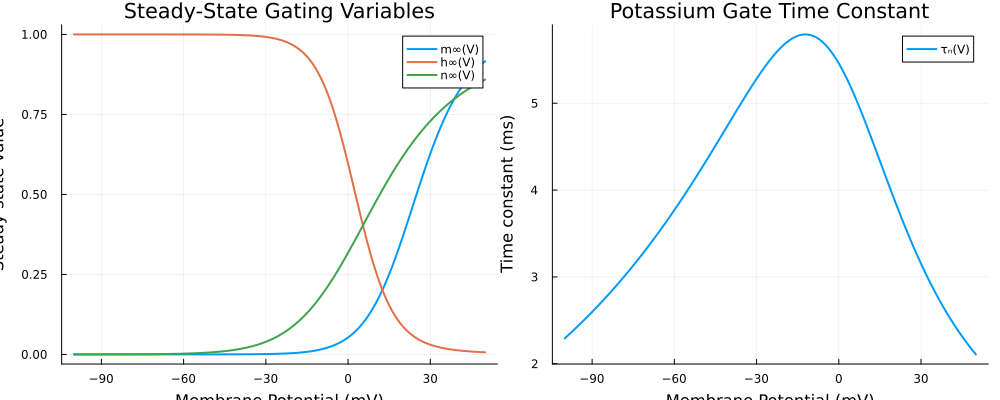

In [12]:
p1 = plot(Vs, m_vals, label="m∞(V)", lw=2)
plot!(p1, Vs, h_vals, label="h∞(V)", lw=2)
plot!(p1, Vs, n_vals, label="n∞(V)", lw=2)
xlabel!(p1, "Membrane Potential (mV)")
ylabel!(p1, "Steady-state value")
title!(p1, "Steady-State Gating Variables")

p2 = plot(Vs, tau_n_vals,
          label="τₙ(V)",
          lw=2,
          xlabel="Membrane Potential (mV)",
          ylabel="Time constant (ms)",
          title="Potassium Gate Time Constant")

plot(p1, p2, layout=(1,2), size=(1000,400))
